In [1]:
import pandas as pd

file_path = r'C:\Users\brigh\Documents\GitHub\warehouse\Data_analysis_competition\my_data\학교별\일반대학\2021_중도탈락 학생 현황 (대학).xlsx'
df = pd.read_excel(file_path)
df

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생\n(A),사유별 중도탈락 학생,Unnamed: 8,Unnamed: 9,...,사유별 중도탈락 학생(신입생),Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,중도탈락학생(신입생)비율(%)\n(B`/A`) × 100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,계(B),미등록,미복학,...,계(B`),미등록,미복학,자퇴,학사경고,학생활동,유급제적,수업연한초과,기타,NaN
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),2693.0,232,56,34,...,59,21,0,33,0,0,0,0,5,13.1
2,2021.0,대학교,사립,경기,기존,가천대학교,25871.0,941,111,184,...,289,9,0,280,0,0,0,0,0,6.5
3,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,11694.0,690,11,171,...,100,2,0,98,0,0,0,0,0,6.1
4,2021.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,567.0,13,0,0,...,5,0,0,5,0,0,0,0,0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021.0,산업대학,사립,전북,기존,호원대학교,6700.0,723,184,250,...,144,72,0,71,0,0,0,0,1,11.8
241,2021.0,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,8240.0,458,70,79,...,165,42,1,122,0,0,0,0,0,12.0
242,2021.0,대학교,사립,서울,기존,홍익대학교,17620.0,718,88,63,...,344,37,0,307,0,0,0,0,0,12.2
243,2021.0,대학교,사립,경기,기존,화성의과학대학교,841.0,211,7,159,...,4,1,0,3,0,0,0,0,0,5.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   기준연도                            244 non-null    float64
 1   학교종류                            244 non-null    object 
 2   설립구분                            244 non-null    object 
 3   지역                              244 non-null    object 
 4   상태                              244 non-null    object 
 5   학교                              244 non-null    object 
 6   재적학생
(A)                        244 non-null    float64
 7   사유별 중도탈락 학생                     245 non-null    object 
 8   Unnamed: 8                      245 non-null    object 
 9   Unnamed: 9                      245 non-null    object 
 10  Unnamed: 10                     245 non-null    object 
 11  Unnamed: 11                     245 non-null    object 
 12  Unnamed: 12                     245 

In [3]:
# 1. 컬럼 이름 정리
# 첫 번째 행에서 '사유별 중도탈락 학생' 이후 열들은 사유별 탈락자 수
new_columns = [
    '기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재적학생수_A', 
    '중도탈락_계', '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고',
    '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타',
    '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap', 
    '중도탈락_계_신입생', '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
    '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생',
    '중도탈락_수업연한초과_신입생', '중도탈락_기타_신입생', '중도탈락비율(%)_신입생'
]

len(new_columns) # 28

28

In [4]:
# 열 수가 맞으면 교체
df.columns = new_columns

# 2. 의미 없는 열 삭제 (이미 없는 상태로 가정)

# 3. 수치 데이터 숫자형 변환
# '학교명' 같은 것은 제외하고, 수치형 컬럼만 변환
numeric_cols = [col for col in df.columns if '중도탈락' in col or '재적학생수' in col]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생수_A,중도탈락_계,중도탈락_미등록,중도탈락_미복학,...,중도탈락_계_신입생,중도탈락_미등록_신입생,중도탈락_미복학_신입생,중도탈락_자퇴_신입생,중도탈락_학사경고_신입생,중도탈락_학생활동_신입생,중도탈락_유급제적_신입생,중도탈락_수업연한초과_신입생,중도탈락_기타_신입생,중도탈락비율(%)_신입생
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),2693.0,232.0,56.0,34.0,...,59.0,21.0,0.0,33.0,0.0,0.0,0.0,0.0,5.0,13.1
2,2021.0,대학교,사립,경기,기존,가천대학교,25871.0,941.0,111.0,184.0,...,289.0,9.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,6.5
3,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,11694.0,690.0,11.0,171.0,...,100.0,2.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,6.1
4,2021.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,567.0,13.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.6


In [5]:
# 모든 컬럼이 NaN인 행 삭제
df = df.dropna(how='all').reset_index(drop=True)
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생수_A,중도탈락_계,중도탈락_미등록,중도탈락_미복학,...,중도탈락_계_신입생,중도탈락_미등록_신입생,중도탈락_미복학_신입생,중도탈락_자퇴_신입생,중도탈락_학사경고_신입생,중도탈락_학생활동_신입생,중도탈락_유급제적_신입생,중도탈락_수업연한초과_신입생,중도탈락_기타_신입생,중도탈락비율(%)_신입생
0,2021.0,대학교,사립,경남,기존,가야대학교(김해),2693.0,232.0,56.0,34.0,...,59.0,21.0,0.0,33.0,0.0,0.0,0.0,0.0,5.0,13.1
1,2021.0,대학교,사립,경기,기존,가천대학교,25871.0,941.0,111.0,184.0,...,289.0,9.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,6.5
2,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,11694.0,690.0,11.0,171.0,...,100.0,2.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,6.1
3,2021.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,567.0,13.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.6
4,2021.0,대학교,사립,서울,기존,가톨릭대학교 _제3캠퍼스,306.0,10.0,2.0,1.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.8


In [6]:
df.shape, df.columns

((244, 28),
 Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재적학생수_A', '중도탈락_계',
        '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고', '중도탈락_학생활동',
        '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타', '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap',
        '중도탈락_계_신입생', '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
        '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생', '중도탈락_수업연한초과_신입생',
        '중도탈락_기타_신입생', '중도탈락비율(%)_신입생'],
       dtype='object'))

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [9]:
# 상관계수 분석을 위한 컬럼 선택
correlation_cols = ['재적학생수_A', '중도탈락_계',
       '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고', '중도탈락_학생활동',
       '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타', '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap',
       '중도탈락_계_신입생', '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
       '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생', '중도탈락_수업연한초과_신입생',
       '중도탈락_기타_신입생', '중도탈락비율(%)_신입생'
]
correlation_matrix = df[correlation_cols].corr()
# correlation_matrix # 상관계수 행렬

In [10]:
# 중도탈락비율과 각 사유별 상관계수 추출
dropout_correlations = correlation_matrix['중도탈락비율(%)_기존생'].sort_values(ascending=False)
print("\n중도탈락비율과 각 사유의 상관계수:")
print(dropout_correlations)


중도탈락비율과 각 사유의 상관계수:
중도탈락비율(%)_기존생      1.000000
중도탈락비율(%)_신입생      0.727354
중도탈락_미등록_신입생       0.467388
중도탈락_미복학           0.328770
중도탈락_미등록           0.258502
중도탈락_계             0.257201
중도탈락_계_신입생         0.242760
중도탈락_기타            0.222886
중도탈락_기타_신입생        0.178667
중도탈락_자퇴            0.150620
중도탈락_자퇴_신입생        0.043213
중도탈락_수업연한초과        0.012916
재적학생수_A            0.000412
재적학생수_신입생_Ap      -0.037238
중도탈락_미복학_신입생      -0.041065
중도탈락_학사경고_신입생     -0.041684
중도탈락_학생활동         -0.043401
중도탈락_학생활동_신입생     -0.052330
중도탈락_유급제적_신입생     -0.052330
중도탈락_유급제적         -0.126848
중도탈락_학사경고         -0.209426
중도탈락_수업연한초과_신입생         NaN
Name: 중도탈락비율(%)_기존생, dtype: float64


In [12]:
correlation_matrix

,재적학생수_A,중도탈락_계,중도탈락_미등록,중도탈락_미복학,중도탈락_자퇴,중도탈락_학사경고,중도탈락_학생활동,중도탈락_유급제적,중도탈락_수업연한초과,중도탈락_기타,...,중도탈락_계_신입생,중도탈락_미등록_신입생,중도탈락_미복학_신입생,중도탈락_자퇴_신입생,중도탈락_학사경고_신입생,중도탈락_학생활동_신입생,중도탈락_유급제적_신입생,중도탈락_수업연한초과_신입생,중도탈락_기타_신입생,중도탈락비율(%)_신입생
재적학생수_A,1.000000,0.835440,0.755924,0.297711,0.954120,0.349750,0.061682,0.078824,0.044295,0.724780,...,0.810286,0.036951,0.089869,0.935734,0.048494,-0.025820,-0.042553,NaN,0.268662,-0.083299
중도탈락_계,0.835440,1.000000,0.986577,0.140696,0.931824,0.030572,0.008150,-0.006789,0.013465,0.936934,...,0.699331,0.124494,0.007941,0.751238,0.004490,-0.015869,-0.018605,NaN,0.348663,0.061327
중도탈락_미등록,0.755924,0.986577,1.000000,0.009981,0.866864,-0.036964,-0.011132,-0.016662,-0.007664,0.943856,...,0.613161,0.096134,-0.005493,0.663615,0.001672,-0.007254,-0.007476,NaN,0.324156,0.070646
중도탈락_미복학,0.297711,0.140696,0.009981,1.000000,0.298963,0.170467,0.110271,-0.013036,0.051928,-0.004488,...,0.475857,0.462414,0.026922,0.328984,-0.000438,-0.044786,-0.056983,NaN,0.155867,0.104614
중도탈락_자퇴,0.954120,0.931824,0.866864,0.298963,1.000000,0.185036,0.044643,0.031579,0.029414,0.820830,...,0.809749,0.108506,0.044099,0.897169,0.002921,-0.030411,-0.038949,NaN,0.308039,0.000359
중도탈락_학사경고,0.349750,0.030572,-0.036964,0.170467,0.185036,1.000000,0.051613,0.006498,-0.010603,-0.031611,...,0.337590,0.002487,0.144406,0.392936,0.436832,-0.033154,-0.037678,NaN,0.007798,-0.089222
중도탈락_학생활동,0.061682,0.008150,-0.011132,0.110271,0.044643,0.051613,1.000000,-0.024724,-0.017318,-0.018736,...,-0.007803,-0.041009,-0.010699,0.014106,-0.013619,0.348800,-0.008793,NaN,-0.023618,-0.058311
중도탈락_유급제적,0.078824,-0.006789,-0.016662,-0.013036,0.031579,0.006498,-0.024724,1.000000,-0.018959,-0.016245,...,0.022077,-0.063738,-0.000781,0.059644,-0.017921,-0.011571,0.534866,NaN,-0.013982,-0.076154
중도탈락_수업연한초과,0.044295,0.013465,-0.007664,0.051928,0.029414,-0.010603,-0.017318,-0.018959,1.000000,-0.015827,...,0.026451,-0.023014,-0.006780,0.046306,-0.006965,-0.008105,-0.008105,NaN,-0.020847,-0.033969
중도탈락_기타,0.724780,0.936934,0.943856,-0.004488,0.820830,-0.031611,-0.018736,-0.016245,-0.015827,1.000000,...,0.555352,-0.010938,-0.010688,0.625603,-0.008476,-0.008866,-0.008866,NaN,0.536768,0.058201


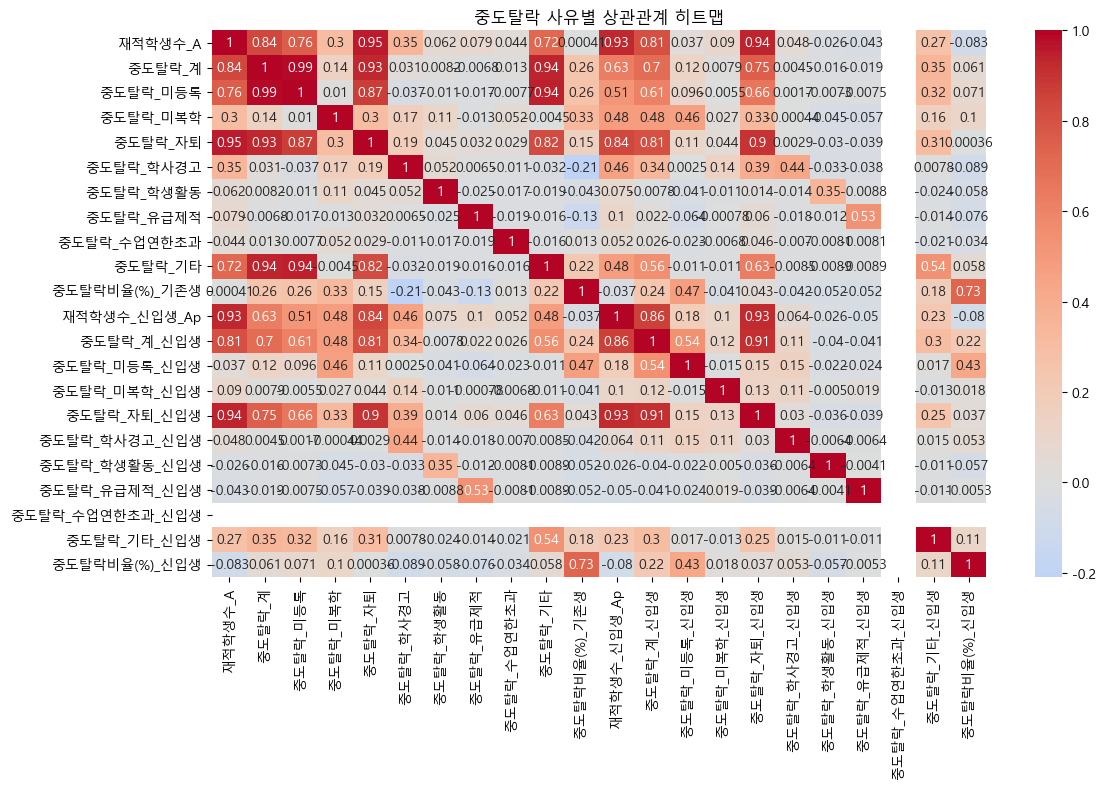

In [11]:
# 히트맵으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
           annot=True,  # 상관계수 표시
           cmap='coolwarm',  # 색상 맵
           center=0)  # 0을 중심으로 색상 대비
plt.title('중도탈락 사유별 상관관계 히트맵')
plt.tight_layout()
plt.show()

- 상관계수: 두 변수의 직선적 강도와 방향
- 비율: 전체 탈락자 중 특정 사유가 차지하는 비중